# Using DNN for Image Classification

## Importing libraries 

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Using NVIDIA GPU for Model Training

In [22]:
# Check if GPU is available and set it as the default device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    tf.config.set_visible_devices(physical_devices[0], "GPU")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


## Defining Image Data for Model Training

In [23]:
# Define the image data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


## Setting Constant Details

In [30]:
image_size = (224, 224)  # Set the desired image size
class_names = ['AMD', 'DME', 'Normal']

## Setting Image Directory Paths for Test and Train Data

In [24]:
# Set the image directory and parameters
train_data_dir = r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Train"
validation_data_dir = r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test"
img_width, img_height = 224, 224
batch_size = 32
num_classes = 3
epochs = 15

## Using Pre-trained VGG16 Model

In [25]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model's layers to prevent training
base_model.trainable = False

## Building and Training DNN Model

In [26]:
# Build the model by adding the top layers for classification
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

In [27]:
# Compile the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

In [28]:
# Prepare the data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 2600 images belonging to 3 classes.
Found 330 images belonging to 3 classes.


In [29]:
with tf.device("/GPU:0"):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size
    )

Epoch 1/15
81/81 [==============================] - 377s 5s/step - loss: 0.9084 - accuracy: 0.6199 - val_loss: 0.6970 - val_accuracy: 0.7312
Epoch 2/15
81/81 [==============================] - 363s 4s/step - loss: 0.5983 - accuracy: 0.8018 - val_loss: 0.4972 - val_accuracy: 0.8500
Epoch 3/15
81/81 [==============================] - 375s 5s/step - loss: 0.4437 - accuracy: 0.8618 - val_loss: 0.3832 - val_accuracy: 0.8719
Epoch 4/15
81/81 [==============================] - 369s 5s/step - loss: 0.3482 - accuracy: 0.8902 - val_loss: 0.3230 - val_accuracy: 0.8906
Epoch 5/15
81/81 [==============================] - 359s 4s/step - loss: 0.2797 - accuracy: 0.9178 - val_loss: 0.2646 - val_accuracy: 0.9187
Epoch 6/15
81/81 [==============================] - 387s 5s/step - loss: 0.2550 - accuracy: 0.9182 - val_loss: 0.2298 - val_accuracy: 0.9250
Epoch 7/15
81/81 [==============================] - 359s 4s/step - loss: 0.2098 - accuracy: 0.9412 - val_loss: 0.2114 - val_accuracy: 0.9375
Epoch 8/15
81

## Visualizing the Model Training

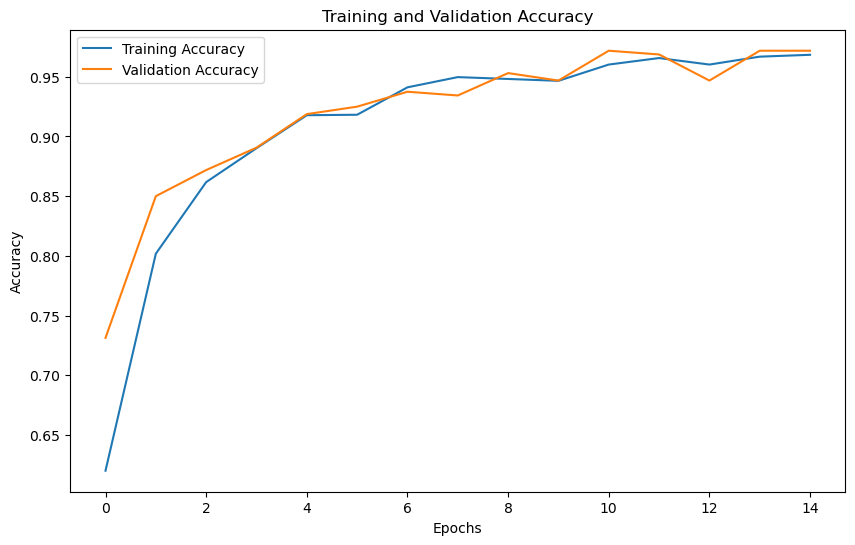

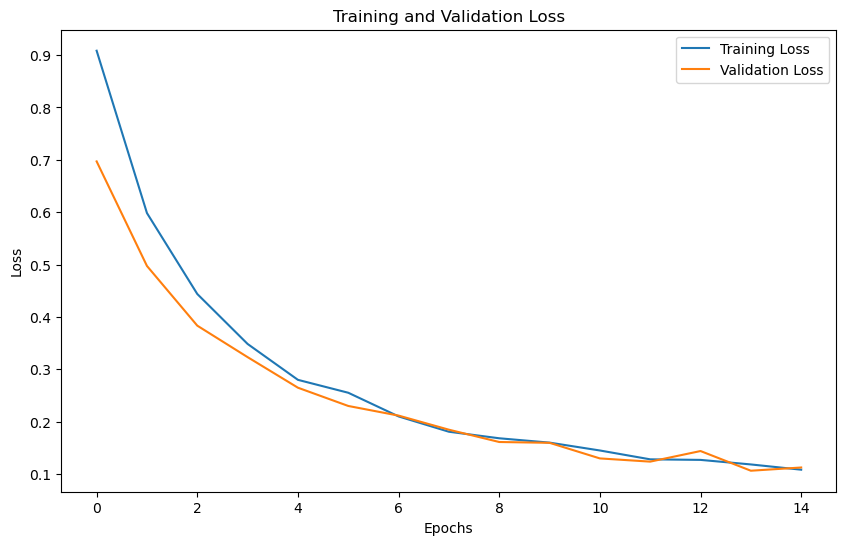

In [31]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating Model
Using Precision, Recall, Binary Accuracy, F1 Score and Confusion Matrix

In [32]:
# Testing the Model using Precision Recall and Binary Accuracy
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score

# Load the test data
test_data_dir = validation_data_dir
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Get the ground truth labels
true_labels = test_generator.classes

# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate precision, recall, and binary accuracy
precision = precision_score(true_labels, predicted_labels, average="macro")
recall = recall_score(true_labels, predicted_labels, average="macro")
accuracy = accuracy_score(true_labels, predicted_labels)

print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nAccuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Calculate the F1 score
f1 = f1_score(true_labels, predicted_labels, average="macro")

print("\nConfusion Matrix:")
print(confusion_mat)
print("\nF1 Score:", f1)

Found 330 images belonging to 3 classes.
11/11 [==============================] - 39s 3s/step

Precision: 0.9753188474256023

Recall: 0.9646681163922542

Accuracy: 0.9727272727272728

Confusion Matrix:
[[ 68   6   0]
 [  0 109   2]
 [  0   1 144]]

F1 Score: 0.969263207810071


## Error Analysis
Taking error Threshold 0.5

In [34]:
# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)

# Define the threshold for low confidence
threshold = 0.5

# Perform error analysis
misclassified_samples = []
low_confidence_samples = []

for i in range(len(true_labels)):
    true_label = true_labels[i]
    predicted_label = predicted_labels[i]
    confidence = confidence_scores[i]

    # Check for misclassified samples
    if true_label != predicted_label:
        misclassified_samples.append((i, true_label, predicted_label, confidence))

    # Check for low confidence predictions
    if confidence < threshold:
        low_confidence_samples.append((i, true_label, predicted_label, confidence))

# Print misclassified samples
print("Misclassified Samples:")
for sample in misclassified_samples:
    index, true_label, predicted_label, confidence = sample
    print(f"Sample Index: {index}, True Label: {true_label}, Predicted Label: {predicted_label}, Confidence: {confidence}")

# Print low confidence samples
print("\nLow Confidence Samples:")
for sample in low_confidence_samples:
    index, true_label, predicted_label, confidence = sample
    print(f"Sample Index: {index}, True Label: {true_label}, Predicted Label: {predicted_label}, Confidence: {confidence}")


11/11 [==============================] - 40s 4s/step
Misclassified Samples:
Sample Index: 1, True Label: 0, Predicted Label: 1, Confidence: 0.7563263177871704
Sample Index: 7, True Label: 0, Predicted Label: 1, Confidence: 0.7459858059883118
Sample Index: 12, True Label: 0, Predicted Label: 1, Confidence: 0.6902045607566833
Sample Index: 15, True Label: 0, Predicted Label: 1, Confidence: 0.5530864596366882
Sample Index: 16, True Label: 0, Predicted Label: 1, Confidence: 0.6796292066574097
Sample Index: 54, True Label: 0, Predicted Label: 1, Confidence: 0.720557689666748
Sample Index: 89, True Label: 1, Predicted Label: 2, Confidence: 0.5866759419441223
Sample Index: 133, True Label: 1, Predicted Label: 2, Confidence: 0.8254631161689758
Sample Index: 199, True Label: 2, Predicted Label: 1, Confidence: 0.8122082948684692

Low Confidence Samples:
Sample Index: 17, True Label: 0, Predicted Label: 0, Confidence: 0.45770522952079773


## Visualizing the predictions and their associated confidence

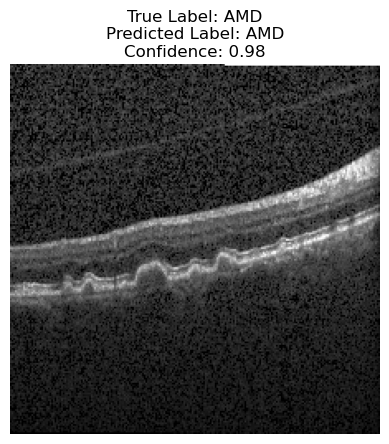

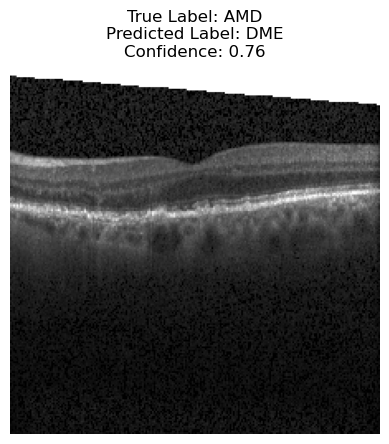

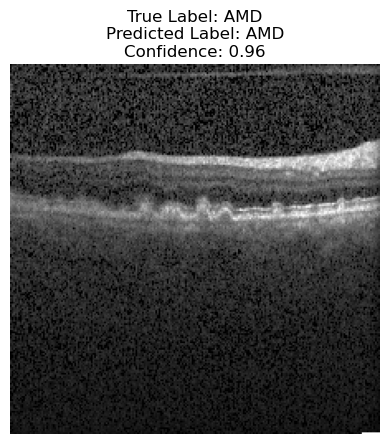

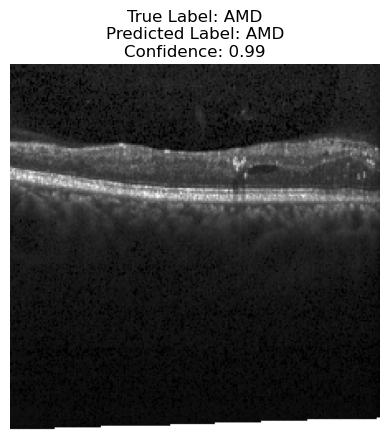

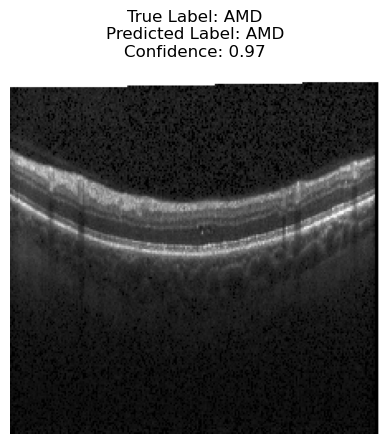

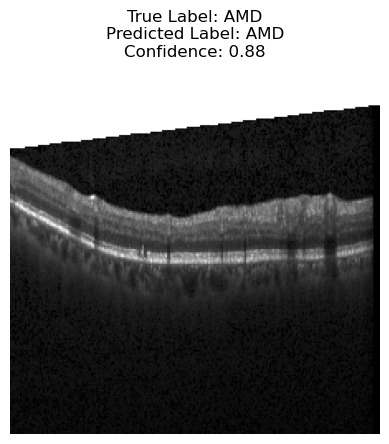

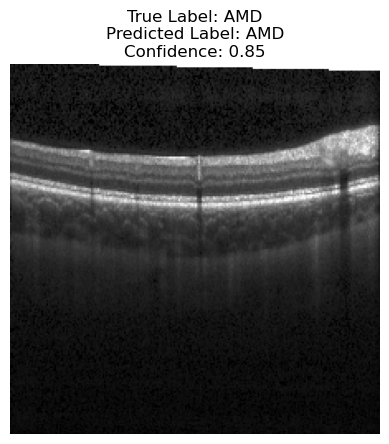

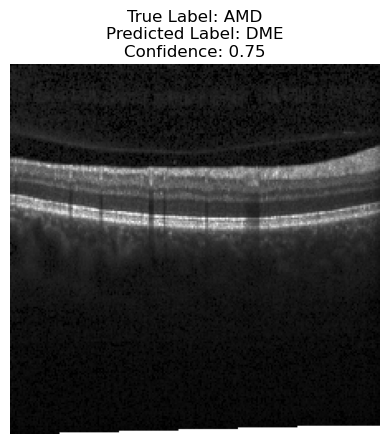

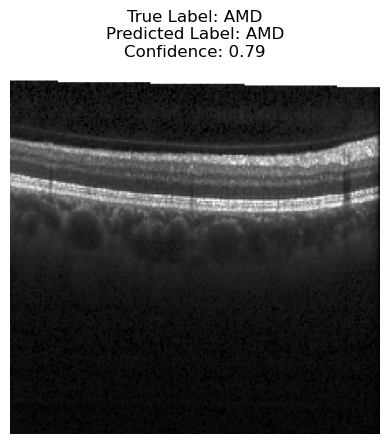

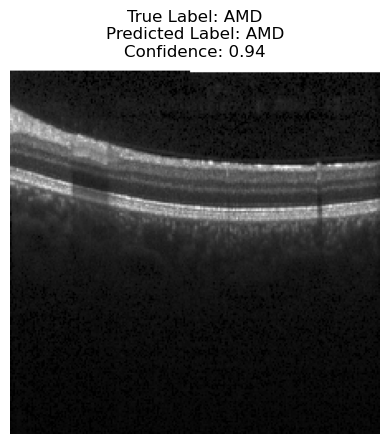

In [35]:
# Define the class labels
class_labels = test_generator.class_indices

# Define the number of samples to visualize
num_samples = 10

# Visualize the predictions
for i in range(num_samples):
    image = test_generator[i][0][0]  # Get the image
    true_label = true_labels[i]  # Get the true label
    predicted_label = predicted_labels[i]  # Get the predicted label
    confidence = confidence_scores[i]  # Get the confidence score

    # Get the class label names
    true_label_name = list(class_labels.keys())[list(class_labels.values()).index(true_label)]
    predicted_label_name = list(class_labels.keys())[list(class_labels.values()).index(predicted_label)]

    # Plot the image and display the predicted label and confidence score
    plt.imshow(image)
    plt.title(f"True Label: {true_label_name}\nPredicted Label: {predicted_label_name}\nConfidence: {confidence:.2f}")
    plt.axis("off")
    plt.show()


## Saving Model

In [36]:
# Save the trained model in the recommended Keras format
model.save("D:/Uzair/Programming/Python/AI CEP/trained_model.keras")

In [37]:
# Load the trained model
model = tf.keras.models.load_model("D:/Uzair/Programming/Python/AI CEP/trained_model.keras")

## Predicting the Results

In [38]:
# Define the image paths you want to test
image_files = [
    r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\AMD\692.tif",
    r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\AMD\709.tif",
   r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\DME\1006.tif",
    r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\DME\1056.tif",
    r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\Normal\988.tif",
    r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\Normal\1092.tif"
]

In [39]:
# Process and classify the images
for image_path in image_files:
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    image = image.resize((224, 224))  # Resize the image to match the input size of the model
    image = np.array(image) / 255.0  # Normalize the pixel values
    image = np.expand_dims(image, axis=0)  # Add a batch dimension

    # Make predictions
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions[0])  # Get the index of the predicted class
    predicted_class_name = class_names[predicted_class_index]  # Get the name of the predicted class

    # Print the predicted class
    print("Image:", image_path)
    print("Predicted Class:", predicted_class_name)


1/1 [==============================] - 0s 262ms/step
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\AMD\692.tif
Predicted Class: AMD
1/1 [==============================] - 0s 140ms/step
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\AMD\709.tif
Predicted Class: AMD
1/1 [==============================] - 0s 135ms/step
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\DME\1006.tif
Predicted Class: DME
1/1 [==============================] - 0s 134ms/step
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\DME\1056.tif
Predicted Class: DME
1/1 [==============================] - 0s 140ms/step
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\Normal\988.tif
Predicted Class: Normal
1/1 [==============================] - 0s 138ms/step
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\Normal\1092.tif
Predicted Class: Normal


# Using RandomForest Classifier for Image Classification

## Importing necessary Libraries

In [16]:
import os
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from joblib import load
from sklearn.svm import SVC

## Converting Images into Numpy arrays

In [2]:
data_dir = r"D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Data"  # Path to the directory containing the image dataset

# Initialize empty lists to store images and labels
images = []
labels = []

# Iterate over the directory and load images
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = Image.open(file_path)
            image = image.convert("RGB")  # Convert the image to RGB mode if necessary
            image = image.resize(image_size)  # Resize the image to the desired size
            image_array = np.array(image)  # Convert the PIL image to a numpy array
            images.append(image_array)
            labels.append(class_name)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

## Spliting Data into Train and Test

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Flattening the Data

In [4]:
# Flatten the image arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

## Making RandomForestClassifier Model

In [5]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [6]:
# Create and train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train_flat, y_train_encoded)

RandomForestClassifier()

In [41]:
# Predict the labels for the test set
y_pred_encoded = classifier.predict(X_test_flat)

# Decode the predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

## Validating Model Accuracy

In [42]:
# Calculate and print the accuracy, precision, and recall
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9744027303754266
Precision: 0.9748812674339542
Recall: 0.9744027303754266
F1 Score: 0.9744108751294963
Confusion Matrix:
[[142   4   3]
 [  1 213   1]
 [  0   6 216]]


## Prediciting the Images Classes

In [9]:
import pickle

# Save the trained classifier to a pickle file
with open("D:/Uzair/Programming/Python/AI CEP/trained_model.pkl", "wb") as file:
    pickle.dump(classifier, file)

In [10]:
# Load the trained Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier = load(r"D:/Uzair/Programming/Python/AI CEP/trained_model.pkl")  # Load the trained model from the saved file

# Initialize empty lists to store the images and their filenames
images = []
filenames = []

# Iterate over the image file paths and load the images
for file_path in image_files:
    image = Image.open(file_path)
    image = image.convert("RGB")  # Convert the image to RGB mode if necessary
    image = image.resize(image_size)  # Resize the image to the desired size
    image_array = np.array(image)  # Convert the PIL image to a numpy array
    images.append(image_array)
    filenames.append(file_path)

# Convert the list of images to a numpy array
images = np.array(images)

# Flatten the image array
images_flat = images.reshape(images.shape[0], -1)

# Make predictions on the images
predictions_encoded = classifier.predict(images_flat)

# Fit the label encoder and transform the predictions
label_encoder = LabelEncoder()
label_encoder.fit(classifier.classes_)
predictions = label_encoder.inverse_transform(predictions_encoded)


# Print the predictions
for filename, prediction in zip(filenames, predictions):
    
    print(f"Image: {filename}, Predicted Class: {class_names[prediction]}")


Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\AMD\692.tif, Predicted Class: AMD
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\AMD\709.tif, Predicted Class: AMD
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\DME\1006.tif, Predicted Class: DME
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\DME\1056.tif, Predicted Class: DME
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\Normal\988.tif, Predicted Class: Normal
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\Normal\1092.tif, Predicted Class: Normal


# Using SupportVectorMachine for Image Classification

## Reshaping Images and Training Model

In [11]:
# Flatten the image array
images_flat = images.reshape(images.shape[0], -1)

In [12]:
# Reshape the X_train array
X_train = X_train.reshape(X_train.shape[0], -1)

# Fit the label encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the SVM classifier
classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
classifier.fit(X_train, y_train_encoded)

SVC()

## Model Validation and Scoring

In [17]:
# Evaluate the model on the testing set
# Reshape the X_test array
X_test = X_test.reshape(X_test.shape[0], -1)
y_pred_encoded = classifier.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         AMD       0.99      0.95      0.97       149
         DME       0.96      0.99      0.97       215
      Normal       0.98      0.97      0.98       222

    accuracy                           0.97       586
   macro avg       0.98      0.97      0.97       586
weighted avg       0.97      0.97      0.97       586

[[142   4   3]
 [  1 213   1]
 [  0   6 216]]


## Saving Model

In [18]:
import pickle

# Save the trained classifier to a pickle file
with open("D:/Uzair/Programming/Python/AI CEP/SVM_model.pkl", "wb") as file:
    pickle.dump(classifier, file)

## Predicting Results

In [20]:
# Load the trained Random Forest classifier
classifier = load(r"D:/Uzair/Programming/Python/AI CEP/SVM_model.pkl")  # Load the trained model from the saved file

# Initialize empty lists to store the images and their filenames
images = []
filenames = []

# Iterate over the image file paths and load the images
for file_path in image_files:
    image = Image.open(file_path)
    image = image.convert("RGB")  # Convert the image to RGB mode if necessary
    image = image.resize(image_size)  # Resize the image to the desired size
    image_array = np.array(image)  # Convert the PIL image to a numpy array
    images.append(image_array)
    filenames.append(file_path)

# Convert the list of images to a numpy array
images = np.array(images)

# Flatten the image array
images_flat = images.reshape(images.shape[0], -1)

# Make predictions on the images
predictions_encoded = classifier.predict(images_flat)

# Fit the label encoder and transform the predictions
label_encoder = LabelEncoder()
label_encoder.fit(class_names)
predictions = label_encoder.inverse_transform(predictions_encoded)

# Print the predictions
for filename, prediction in zip(filenames, predictions):
    print(f"Image: {filename}, Predicted Class: {prediction}")


Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\AMD\692.tif, Predicted Class: AMD
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\AMD\709.tif, Predicted Class: AMD
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\DME\1006.tif, Predicted Class: DME
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\DME\1056.tif, Predicted Class: DME
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\Normal\988.tif, Predicted Class: Normal
Image: D:\Uzair\Programming\Python\AI CEP\ADN eye dataset\Test\Normal\1092.tif, Predicted Class: Normal
